In [ ]:
#In this code english dataset is used and the methods included are text preprocessing, tokenization, tfidf vectorization

In [1]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

#Data Reading
stress_c= pd.read_csv(r'C:\Users\DELL\Desktop\Language_translator\Stress.csv')

# Copy
stress=stress_c.copy()

# Data
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [2]:
# Info
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [3]:
# Checking null values
stress.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [4]:
# Statistical Information
stress.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


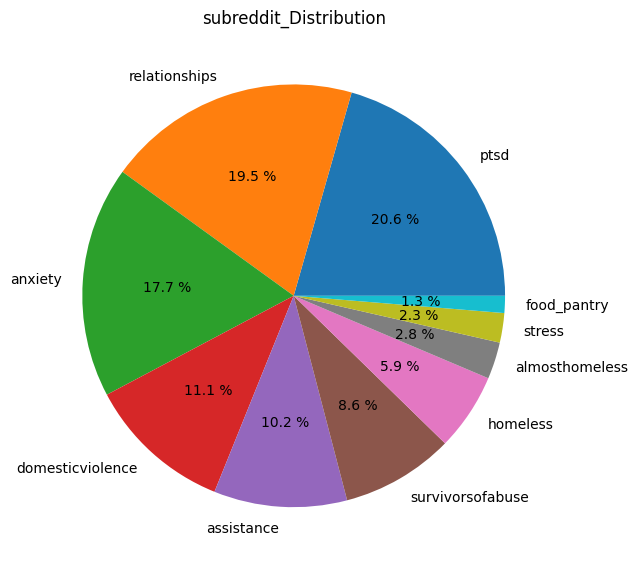

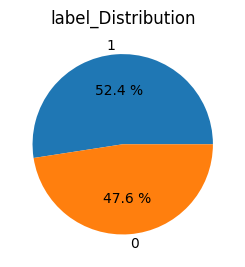

In [5]:
lst=['subreddit','label']
plt.figure(figsize=(15,12))
for i in range(len(lst)):
    plt.subplot(1,2,i+1)
    a=stress[lst[i]].value_counts()
    lbl=a.index
    plt.title(lst[i]+'_Distribution')
    plt.pie(x=a,labels=lbl,autopct="%.1f %%")
    plt.show()

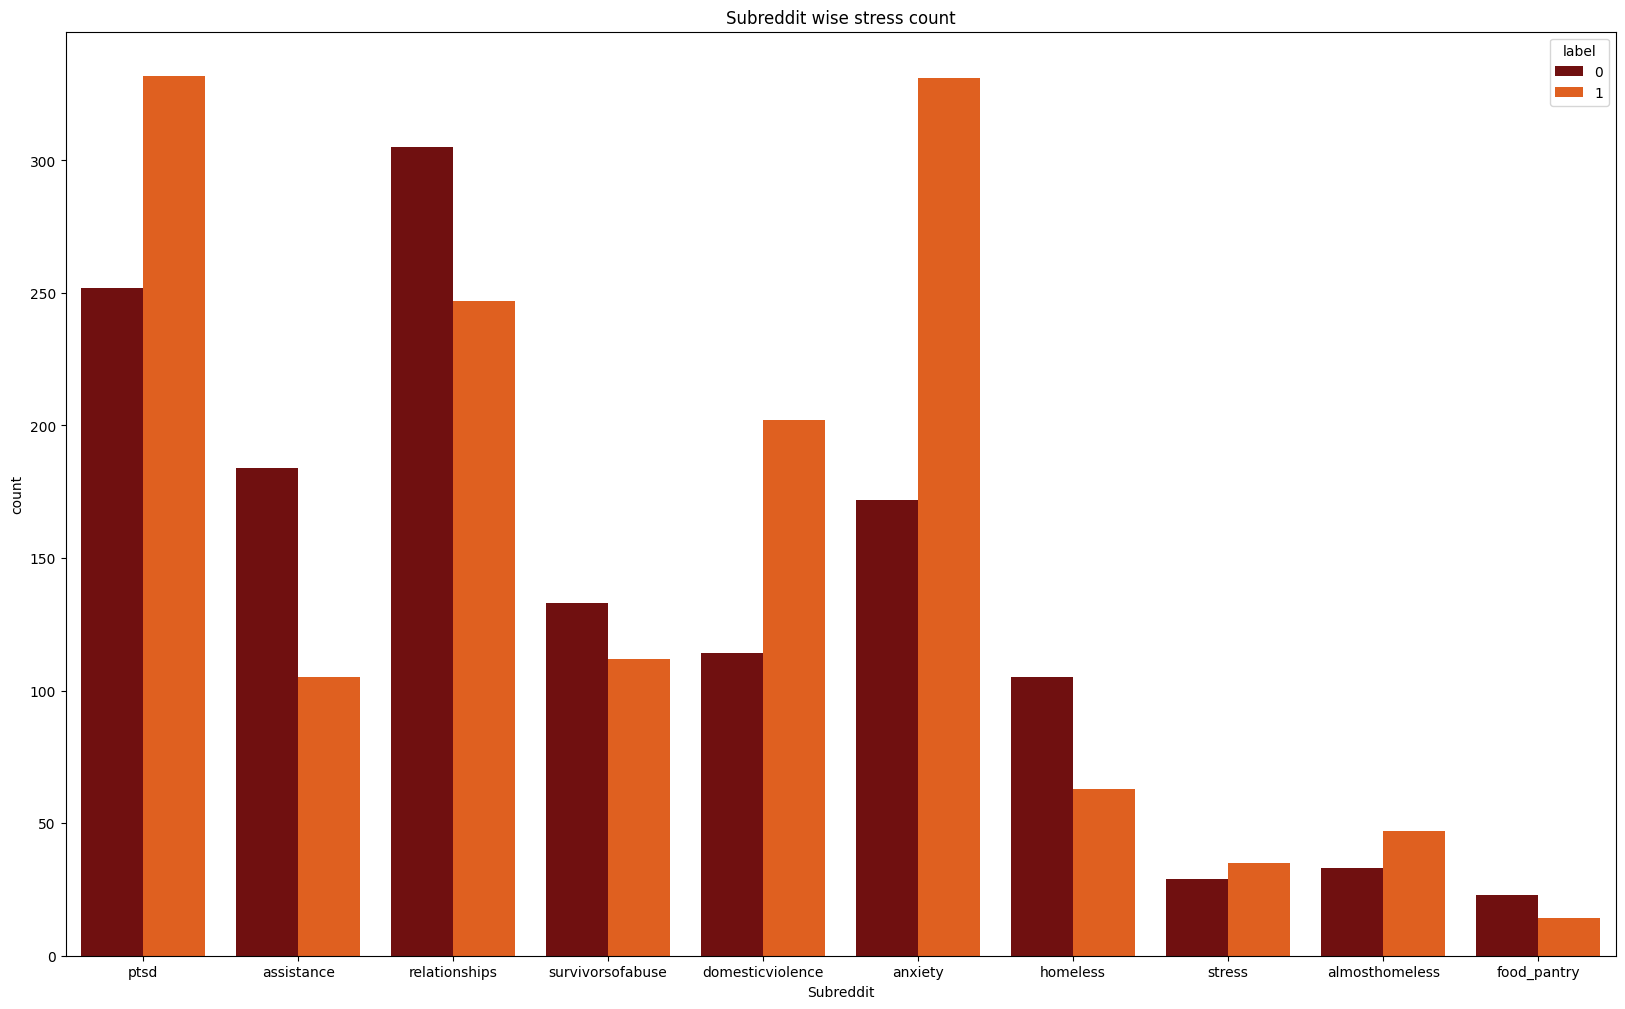

In [6]:
plt.figure(figsize=(20,12))
plt.title('Subreddit wise stress count')
plt.xlabel('Subreddit')
sns.countplot(data=stress,x='subreddit',hue='label',palette='gist_heat')
plt.show()

In [10]:
# Regular Expression
import re 

# Handling string
import string

# NLP tool
import spacy

nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

# Importing Natural Language Tool Kit for NLP operations
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')                                
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


In [11]:
#defining function for preprocessing
def preprocess(text,remove_digits=True):
    text = re.sub('\W+',' ', text)                                       
    text = re.sub('\s+',' ', text)                                       
    text = re.sub("(?<!\w)\d+", "", text)                                
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)                          
    text=text.lower()
    nopunc=[char for char in text if char not in string.punctuation]    
    nopunc=''.join(nopunc)
    nopunc=' '.join([word for word in nopunc.split()
               if word.lower() not in stopwords.words('english')])  
    
    
    return nopunc
# Defining a function for lemitization
def lemmatize(words):
   
    words=nlp(words)
    lemmas = []
    for word in words:
        
        lemmas.append(word.lemma_)
    return lemmas



#converting them into string
def listtostring(s):
    str1=' '
    return (str1.join(s))

def clean_text(input):
    word=preprocess(input)
    lemmas=lemmatize(word)
    return listtostring(lemmas)

In [12]:
# Creating a feature to store clean texts
stress['clean_text']=stress['text'].apply(clean_text)
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,clean_text
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,say feel way suggete go rest trigger ahead you...
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,hey r assistance sure right place post go curr...
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,mom hit newspaper shock would know like play h...
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,meet new boyfriend amazing kind sweet good stu...
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,october domestic violence awareness month dome...


In [14]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [15]:
# Defining target & feature for ML model building
x=stress['clean_text']
y=stress['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
# Self-defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by Logistic regression

def model_lr_tf(x_train, x_test, y_train, y_test):
    global acc_lr_tf,f1_lr_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = LogisticRegression()
    
    #fitting training data into the model & predicting
    t0 = time()

    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_tf=accuracy_score(y_test,y_pred)
    f1_lr_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy: ',acc_lr_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_lr_tf

In [17]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by MultinomialNB

def model_nb_tf(x_train, x_test, y_train, y_test):
    global acc_nb_tf,f1_nb_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)

    ovr = MultinomialNB()
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_tf=accuracy_score(y_test,y_pred)
    f1_nb_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_nb_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_nb_tf


In [18]:
# Self defining function to convert the data into vector form by tf idf
# vectorizer and classify and create model by Decision Tree
def model_dt_tf(x_train, x_test, y_train, y_test):
    global acc_dt_tf,f1_dt_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    ovr = DecisionTreeClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_tf=accuracy_score(y_test,y_pred)
    f1_dt_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_dt_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_dt_tf

In [19]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by KNN

def model_knn_tf(x_train, x_test, y_train, y_test):
    global acc_knn_tf,f1_knn_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    ovr = KNeighborsClassifier()
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_tf=accuracy_score(y_test,y_pred)
    f1_knn_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_knn_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))


In [20]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by Random Forest

def model_rf_tf(x_train, x_test, y_train, y_test):
    global acc_rf_tf,f1_rf_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)

    ovr = RandomForestClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_rf_tf=accuracy_score(y_test,y_pred)
    f1_rf_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_rf_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))


In [21]:
# Self defining function to convert the data into vector form by tf idf
# vectorizer and classify and create model by Adaptive Boosting

def model_ab_tf(x_train, x_test, y_train, y_test):
    global acc_ab_tf,f1_ab_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    
    ovr = AdaBoostClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_ab_tf=accuracy_score(y_test,y_pred)
    f1_ab_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_ab_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

In [22]:
# Evaluating Models

print('********************Logistic Regression*********************')
print('\n')
model_lr_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Multinomial NB*********************')
print('\n')
model_nb_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Decision Tree*********************')
print('\n')
model_dt_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************KNN*********************')
print('\n')
model_knn_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Random Forest Bagging*********************')
print('\n')
model_rf_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Adaptive Boosting*********************')
print('\n')
model_ab_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')

********************Logistic Regression*********************


Time : 0.03008103370666504
Accuracy:  0.7335680751173709
Confusion Matrix: 
 [[278 116]
 [111 347]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       394
           1       0.75      0.76      0.75       458

    accuracy                           0.73       852
   macro avg       0.73      0.73      0.73       852
weighted avg       0.73      0.73      0.73       852





********************Multinomial NB*********************


Time :  0.008632183074951172
Accuracy:  0.7065727699530516
Confusion Matrix: 
 [[182 212]
 [ 38 420]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.46      0.59       394
           1       0.66      0.92      0.77       458

    accuracy                           0.71       852
   macro avg       0.75      0.69      0.68       852
weighted avg       0.74 

In [23]:
# Creating tabular format for better comparison
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regreesion','Multinomial NB',
            'Decision Tree','KNN','Random Forest','Adaptive Boosting'])
tbl['Accuracy']=pd.Series([acc_lr_tf,acc_nb_tf,acc_dt_tf,acc_knn_tf,
                  acc_rf_tf,acc_ab_tf])
tbl['F1_Score']=pd.Series([f1_lr_tf,f1_nb_tf,f1_dt_tf,f1_knn_tf,
                  f1_rf_tf,f1_ab_tf])
tbl.set_index('Model')
# Best model on the basis of F1 Score
tbl.sort_values('F1_Score',ascending=False)

,Model,Accuracy,F1_Score
0,Logistic Regreesion,0.733568,0.733441
4,Random Forest,0.723005,0.719957
1,Multinomial NB,0.706573,0.688416
3,KNN,0.680751,0.678345
5,Adaptive Boosting,0.646714,0.647104
2,Decision Tree,0.605634,0.606156


In [30]:
# Using cross validation method to avoid overfitting
import statistics as st
vector = TfidfVectorizer()

x_train_v = vector.fit_transform(x_train)
x_test_v  = vector.transform(x_test)

# Model building
lr =LogisticRegression()
mnb=MultinomialNB()
dct=DecisionTreeClassifier(random_state=1)
knn=KNeighborsClassifier()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
m  =[lr,mnb,dct,knn,rf,ab]
model_name=['Logistic R','MultiNB','DecTRee','KNN','R forest','Ada Boost']

results, mean_results, p, f1_test=list(),list(),list(),list()


#Model fitting,cross-validating and evaluating performance

def algor(model):
    print('\n',i)
    pipe=Pipeline([('model',model)])
    pipe.fit(x_train_v,y_train)
    cv=StratifiedKFold(n_splits=5)
    n_scores=cross_val_score(pipe,x_train_v,y_train,scoring='f1_weighted',
                  cv=cv,n_jobs=-1,error_score='raise') 
    results.append(n_scores)
    mean_results.append(st.mean(n_scores))
    print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f),stdev= (%.3f)'%(st.mean(n_scores), min(n_scores),max(n_scores),np.std(n_scores)))
    y_pred=cross_val_predict(model,x_train_v,y_train,cv=cv)
    p.append(y_pred)
    f1=f1_score(y_train,y_pred, average = 'weighted')
    f1_test.append(f1)
    print('f1-Score(test): %.4f'%(f1))

for i in m:
    algor(i)


# Model comparison By Visualizing 

fig=plt.subplots(figsize=(20,15))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('F1 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()

AttributeError: 'csr_matrix' object has no attribute 'lower'

In [26]:
x=stress['clean_text']
y=stress['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)
model_lr_tf=LogisticRegression()

model_lr_tf.fit(x_train,y_train)
y_pred=model_lr_tf.predict(x_test)
# Model Evaluation
    
conf=confusion_matrix(y_test,y_pred)
acc_lr=accuracy_score(y_test,y_pred)
f1_lr=f1_score(y_test,y_pred,average='weighted')

print('Accuracy: ',acc_lr)
print('F1 Score: ',f1_lr)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy:  0.7335680751173709
F1 Score:  0.7334406121674644
Confusion Matrix: 
 [[278 116]
 [111 347]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       394
           1       0.75      0.76      0.75       458

    accuracy                           0.73       852
   macro avg       0.73      0.73      0.73       852
weighted avg       0.73      0.73      0.73       852



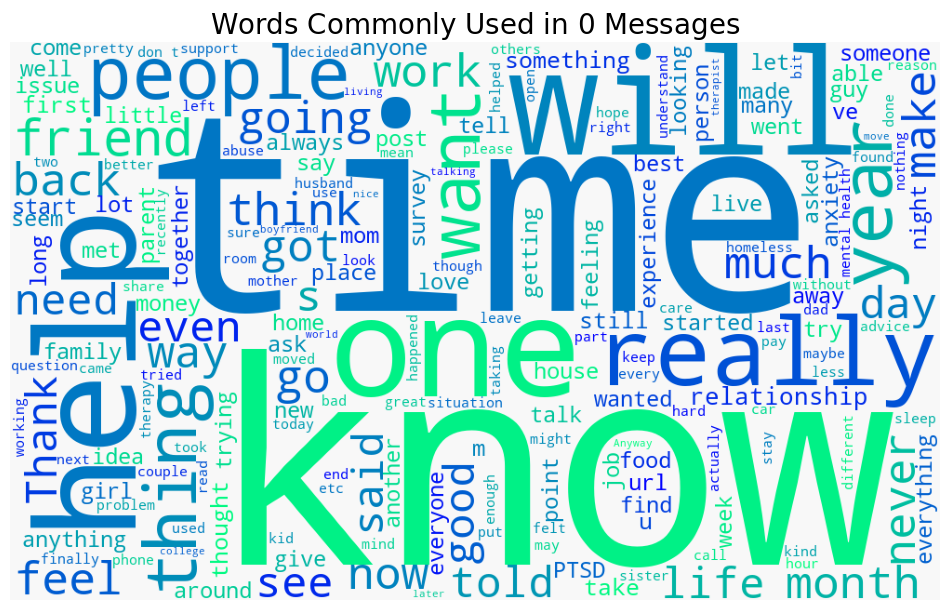

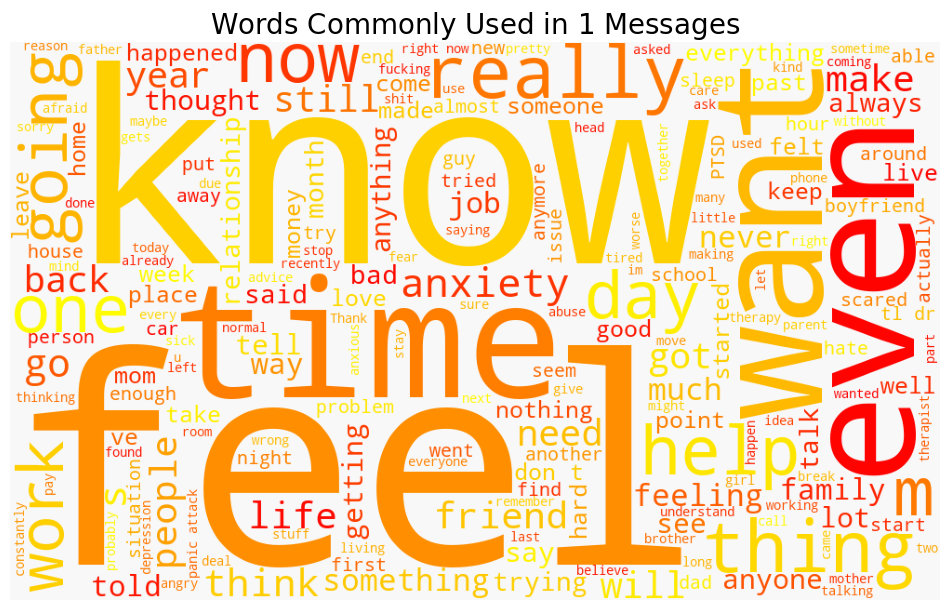

In [27]:
for label, cmap in zip([0,1],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = stress.query('label == @label')['text'].str.cat(sep=' ')
    plt.figure(figsize=(12, 9))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

In [28]:
data=["""I don't have the ability to cope with it anymore. I'm trying, 
      but a lot of things are triggering me, and I'm shutting down at work,
      just finding the place I feel safest, and staying there for an hour
      or two until I feel like I can do something again. I'm tired of watching
      my back, tired of traveling to places I don't feel safe, tired of 
      reliving that moment, tired of being triggered, tired of the stress,
      tired of anxiety and knots in my stomach, tired of irrational thought 
      when triggered, tired of irrational paranoia. I'm exhausted and need
      a break, but know it won't be enough until I journey the long road 
      through therapy. I'm not suicidal at all, just wishing this pain and 
      misery would end, to have my life back again."""]
      
data=vector.transform(data)
model_lr_tf.predict(data)

array([1], dtype=int64)

In [29]:
data=["""In case this is the first time you're reading this post... 
	We are looking for people who are willing to complete some 
	online questionnaires about employment and well-being which
	we hope will help us to improve services for assisting people
	with mental health difficulties to obtain and retain employment. 
	We are developing an employment questionnaire for people with 
	personality disorders; however we are looking for people from all 
	backgrounds to complete it. That means you do not need to have a 
	diagnosis of personality disorder – you just need to have an 
	interest in completing the online questionnaires. The questionnaires
	 will only take about 10 minutes to complete online. For your
	 participation, we’ll donate £1 on your behalf to a mental health 
	 charity (Young Minds: Child & Adolescent Mental Health, Mental
	  Health Foundation, or Rethink)"""]

data=vector.transform(data)
model_lr_tf.predict(data)

array([0], dtype=int64)